In [1]:
import os
import numpy as np
from PIL import Image
import cv2

In [2]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.layers.advanced_activations import ReLU
from keras import optimizers
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import tensorflow as tf

Using TensorFlow backend.


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

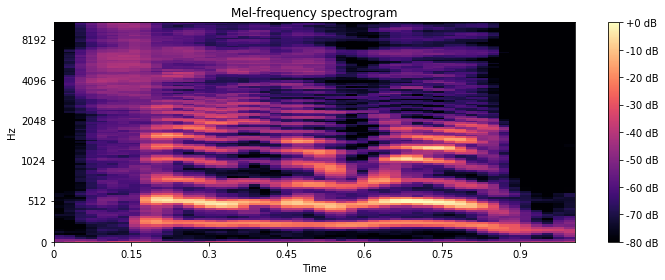

In [4]:
def create_spectrogram(filename):
    plt.figure(figsize=(10, 4))
    clip, sample_rate = librosa.load(filename, sr=None, duration=1)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()

create_spectrogram('output_1/train/angry/OAF_back_angry.wav')

In [5]:
def create_spectrogram(filename):
    clip, sample_rate = librosa.load(filename, sr=None, duration=1)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    S_dB = librosa.power_to_db(S, ref=np.max)
    image = -1*S_dB
    image /= image.max()
    image = cv2.resize(image , dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    return image

In [6]:
train = []
train_labels = []

In [7]:
data_dir = 'output_4'

print('angry...')
for x in os.listdir(data_dir+'/train/angry/') :
    xx = create_spectrogram(data_dir+'/train/angry/'+x)
    train.append(xx)
    train_labels.append(0)

print('sad...')
for x in os.listdir(data_dir+'/train/sad/') :
    xx = create_spectrogram(data_dir+'/train/sad/'+x)
    train.append(xx)
    train_labels.append(1)

print('happy...')
for x in os.listdir(data_dir+'/train/happy/') :
    xx = create_spectrogram(data_dir+'/train/happy/'+x)
    train.append(xx)
    train_labels.append(2)

print('neutral...')
for x in os.listdir(data_dir+'/train/neutral/') :
    xx = create_spectrogram(data_dir+'/train/neutral/'+x)
    train.append(xx)
    train_labels.append(3)

print('disgust...')
for x in os.listdir(data_dir+'/train/disgust/') :
    xx = create_spectrogram(data_dir+'/train/disgust/'+x)
    train.append(xx)
    train_labels.append(4)

print('fear...')
for x in os.listdir(data_dir+'/train/fear/') :
    xx = create_spectrogram(data_dir+'/train/fear/'+x)
    train.append(xx)
    train_labels.append(5)
    
print('surprise...')
for x in os.listdir(data_dir+'/train/surprise/') :
    xx = create_spectrogram(data_dir+'/train/surprise/'+x)
    train.append(xx)
    train_labels.append(6)

angry...
sad...
happy...
neutral...
disgust...
fear...
surprise...


In [8]:
len(train_labels)

1680

In [9]:
test = []
test_labels = []

In [10]:
data_dir = 'output_4'

print('angry...')
for x in os.listdir(data_dir+'/val/angry/') :
    xx = create_spectrogram(data_dir+'/val/angry/'+x)
    test.append(xx)
    test_labels.append(0)

print('sad...')
for x in os.listdir(data_dir+'/val/sad/') :
    xx = create_spectrogram(data_dir+'/val/sad/'+x)
    test.append(xx)
    test_labels.append(1)

print('happy...')
for x in os.listdir(data_dir+'/val/happy/') :
    xx = create_spectrogram(data_dir+'/val/happy/'+x)
    test.append(xx)
    test_labels.append(2)

print('neutral...')
for x in os.listdir(data_dir+'/val/neutral/') :
    xx = create_spectrogram(data_dir+'/val/neutral/'+x)
    test.append(xx)
    test_labels.append(3)

print('disgust...')
for x in os.listdir(data_dir+'/val/disgust/') :
    xx = create_spectrogram(data_dir+'/val/disgust/'+x)
    test.append(xx)
    test_labels.append(4)

print('fear...')
for x in os.listdir(data_dir+'/val/fear/') :
    xx = create_spectrogram(data_dir+'/val/fear/'+x)
    test.append(xx)
    test_labels.append(5)
    
print('surprise...')
for x in os.listdir(data_dir+'/val/surprise/') :
    xx = create_spectrogram(data_dir+'/val/surprise/'+x)
    test.append(xx)
    test_labels.append(6)

angry...
sad...
happy...
neutral...
disgust...
fear...
surprise...


In [11]:
len(test_labels)

1120

In [12]:
model = Sequential([
    Conv2D(30, kernel_size=(11, 11), strides=4, padding='same', activation='relu', input_shape=(256, 256, 1)),#C1
    ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid', data_format=None),
    Conv2D(64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),#C2
    Conv2D(96, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),#C3
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(7, activation='sigmoid')
    # put 6(no. of output)
])

In [13]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
one_hot_labels_train = keras.utils.to_categorical(np.array(train_labels), num_classes=7)
one_hot_labels_test = keras.utils.to_categorical(np.array(test_labels), num_classes=7)

In [15]:
one_hot_labels_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
one_hot_labels_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
print(len(train),len(test))

1680 1120


In [18]:
print(train[500])

[[0.3416165  0.34122366 0.337006   ... 0.36027142 0.35588995 0.3554818 ]
 [0.38702807 0.38685226 0.38496503 ... 0.35559866 0.34793544 0.34722164]
 [0.45795855 0.4581477  0.46017882 ... 0.34790298 0.33489966 0.33368844]
 ...
 [0.95393646 0.9526071  0.93833584 ... 0.83008546 0.82529867 0.8248529 ]
 [0.926361   0.9252003  0.9127393  ... 0.83242327 0.8305058  0.8303273 ]
 [0.909386   0.9083292  0.89698315 ... 0.8336193  0.8334257  0.8334077 ]]


Train on 1680 samples, validate on 1120 samples
Epoch 1/20
1680/1680 [==============================] - 15s 9ms/step - loss: 1.9437 - accuracy: 0.1607 - val_loss: 1.9391 - val_accuracy: 0.1429
Epoch 2/20
1680/1680 [==============================] - 7s 4ms/step - loss: 1.9397 - accuracy: 0.1804 - val_loss: 1.9277 - val_accuracy: 0.3125
Epoch 3/20
1680/1680 [==============================] - 7s 4ms/step - loss: 1.9200 - accuracy: 0.2083 - val_loss: 1.8885 - val_accuracy: 0.3821
Epoch 4/20
1680/1680 [==============================] - 7s 4ms/step - loss: 1.8359 - accuracy: 0.2875 - val_loss: 1.5862 - val_accuracy: 0.4241
Epoch 5/20
1680/1680 [==============================] - 7s 4ms/step - loss: 1.4631 - accuracy: 0.4333 - val_loss: 0.8063 - val_accuracy: 0.8313
Epoch 6/20
1680/1680 [==============================] - 7s 4ms/step - loss: 0.9184 - accuracy: 0.6333 - val_loss: 0.3693 - val_accuracy: 0.8848
Epoch 7/20
1680/1680 [==============================] - 7s 4ms/step - loss: 0.5316 - ac

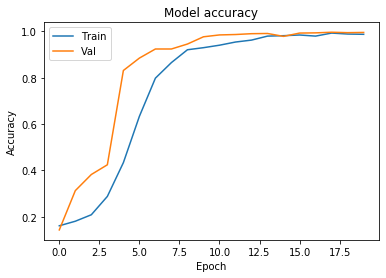

In [19]:
history = model.fit(np.array(train).reshape(len(train),256,256,1),one_hot_labels_train, epochs=20, batch_size=16, validation_data = (np.array(test).reshape(len(test),256,256,1),one_hot_labels_test), shuffle = True)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

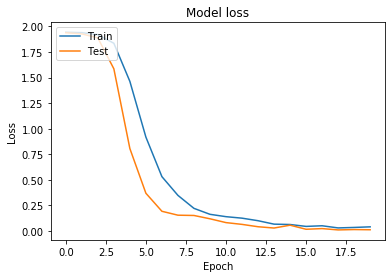

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
len(test)

1120

In [21]:
y_pred = model.predict(np.array(test).reshape(len(test),256,256,1))

In [22]:
np.argmax(y_pred, axis = -1)

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [23]:
np.sum(np.argmax(y_pred, axis = -1) == np.array(test_labels))

1115

In [24]:
tf.math.confusion_matrix(
    np.array(test_labels),
    np.argmax(y_pred, axis = -1),
    num_classes=7,
    weights=None,
    dtype=tf.dtypes.int64,
    name=None
)

<tf.Tensor: id=22616, shape=(7, 7), dtype=int64, numpy=
array([[160,   0,   0,   0,   0,   0,   0],
       [  0, 160,   0,   0,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   1],
       [  0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0, 160,   0,   0],
       [  0,   1,   1,   0,   0, 158,   0],
       [  0,   0,   0,   0,   2,   0, 158]], dtype=int64)>

In [25]:
1105/1120

0.9866071428571429

In [41]:
IMG_SHAPE = (256, 256, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [42]:
train_2 = [ np.dstack((x,x,x)) for x in train ]
test_2 = [ np.dstack((x,x,x)) for x in test ]

In [48]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [52]:
model_2 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5, noise_shape=None, seed=None),
    Dense(7, activation='sigmoid')
    # put 6(no. of output)
])

In [53]:
model_2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train on 1680 samples, validate on 1120 samples
Epoch 1/5
1680/1680 [==============================] - 29s 18ms/step - loss: 0.2743 - accuracy: 0.9119 - val_loss: 0.0611 - val_accuracy: 0.9804
Epoch 2/5
1680/1680 [==============================] - 29s 17ms/step - loss: 0.0394 - accuracy: 0.9893 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 3/5
1680/1680 [==============================] - 29s 17ms/step - loss: 0.0440 - accuracy: 0.9845 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 4/5
1680/1680 [==============================] - 29s 17ms/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0317 - val_accuracy: 0.9920
Epoch 5/5
1680/1680 [==============================] - 29s 17ms/step - loss: 0.0161 - accuracy: 0.9976 - val_loss: 0.0231 - val_accuracy: 0.9929


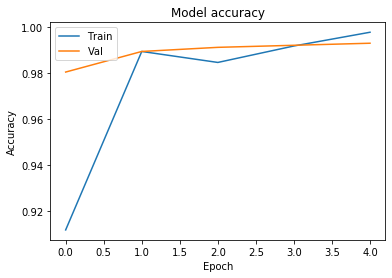

In [54]:
history_2 = model_2.fit(np.array(train_2),one_hot_labels_train, epochs=5, batch_size=16, validation_data = (np.array(test_2),one_hot_labels_test), shuffle = True)

# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()